## **Zillow House Prices Modeling & Forecasting**

### **Data and Dependencies Load**

In [5]:
# Dependencies Load

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 100
pd.options.display.max_columns = None

In [6]:
# Data Load

zhvi = pd.read_pickle('../data/zhvi.pkl')
zori = pd.read_pickle('../data/zori.pkl')

### **Data Preparation**

### **Modeling**

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Narrow down the dataset to have records after Dec 2020 due to COVID
zhvi = zhvi[zhvi['Date'] > '2020-12-31']

# Set date as index
zhvi = zhvi.set_index('Date')

# Extract date features
zhvi['Year'] = zhvi.index.year
zhvi['Month'] = zhvi.index.month
zhvi['Week'] = zhvi.index.isocalendar().week
zhvi['Day'] = zhvi.index.day

# One-hot encode categorical features
categorical_cols = ['Region', 'State', 'Type']
numerical_cols = ['ZHVI']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
categorical_pipeline = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_cols)], remainder='passthrough')

X = categorical_pipeline.fit_transform(zhvi[categorical_cols + numerical_cols + ['Year', 'Month', 'Week', 'Day']])
y = zhvi['ZHVI']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_reg_forecast = rf_reg.predict(X_test)
rf_reg_mse = mean_squared_error(y_test, rf_reg_forecast)
rf_reg_r2 = r2_score(y_test, rf_reg_forecast)
print(f'Random Forest Regression MSE: {rf_reg_mse:.2f}, R^2: {rf_reg_r2:.2f}')

# XGBoost Regression
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
xgb_reg_forecast = xgb_reg.predict(X_test)
xgb_reg_mse = mean_squared_error(y_test, xgb_reg_forecast)
xgb_reg_r2 = r2_score(y_test, xgb_reg_forecast)
print(f'XGBoost Regression MSE: {xgb_reg_mse:.2f}, R^2: {xgb_reg_r2:.2f}')

# LightGBM Regression
lgbm_reg = LGBMRegressor(random_state=42)
lgbm_reg.fit(X_train, y_train)
lgbm_reg_forecast = lgbm_reg.predict(X_test)
lgbm_reg_mse = mean_squared_error(y_test, lgbm_reg_forecast)
lgbm_reg_r2 = r2_score(y_test, lgbm_reg_forecast)
print(f'LightGBM Regression MSE: {lgbm_reg_mse:.2f}, R^2: {lgbm_reg_r2:.2f}')

# Streamlit app
# def predict_zhvi(state, type, date):
#     region = 'N/A'  # Replace with appropriate value if region is needed
#     date_obj = pd.to_datetime(date)
#     year = date_obj.year
#     month = date_obj.month
#     week = date_obj.isocalendar().week
#     day = date_obj.day
#     encoded_data = categorical_pipeline.transform([[region, state, type, year, month, week, day]])
    
#     # Choose the best performing model
#     model = lgbm_reg  # Replace with the desired model
    
#     prediction = model.predict(encoded_data)[0]
#     return prediction

# st.title('Zillow Housing Price Prediction')

# state = st.selectbox('State', df['State'].unique())
# type = st.selectbox('Type', df['Type'].unique())
# date = st.date_input('Date')

# if st.button('Predict'):
#     predicted_zhvi = predict_zhvi(state, type, date)
#     st.write(f'Predicted ZHVI: ${predicted_zhvi:.2f}')

Random Forest Regression MSE: 10662.23, R^2: 1.00
XGBoost Regression MSE: 214015.77, R^2: 1.00
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2193
[LightGBM] [Info] Number of data points in the train set: 118418, number of used features: 954
[LightGBM] [Info] Start training from score 229817.195500
LightGBM Regression MSE: 14801380.98, R^2: 1.00


In [9]:
import pickle

# Export models
with open('../models/rf.pkl', 'wb') as file:
    pickle.dump(rf_reg, file)

with open('../models/xgb.pkl', 'wb') as file:
    pickle.dump(xgb_reg, file)

with open('../models/lgbm.pkl', 'wb') as file:
    pickle.dump(lgbm_reg, file)

#### **ZHVI : ARIMA Model**

In [23]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, r2_score

# ARIMA
arima_model = auto_arima(y_train, seasonal=False, trace=True)
arima_forecast = arima_model.predict(n_periods=len(y_test))
arima_mse = mean_squared_error(y_test, arima_forecast)
arima_r2 = r2_score(y_test, arima_forecast)
print(f'ARIMA MSE: {arima_mse:.2f}, R^2: {arima_r2:.2f}')

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=17.80 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3305175.144, Time=0.58 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3231365.207, Time=0.79 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3271261.132, Time=1.79 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3210315.942, Time=1.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3199993.991, Time=1.29 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3193603.671, Time=1.56 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=3189623.779, Time=2.02 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=46.88 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=33.47 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=3169607.608, Time=36.07 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=3169606.057, Time=4.96 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3169605.719, Time=3.86 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3169604.643, Time=2.37 sec
 ARIMA(1,0,

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ARIMA MSE: 24880080355.48, R^2: -0.00


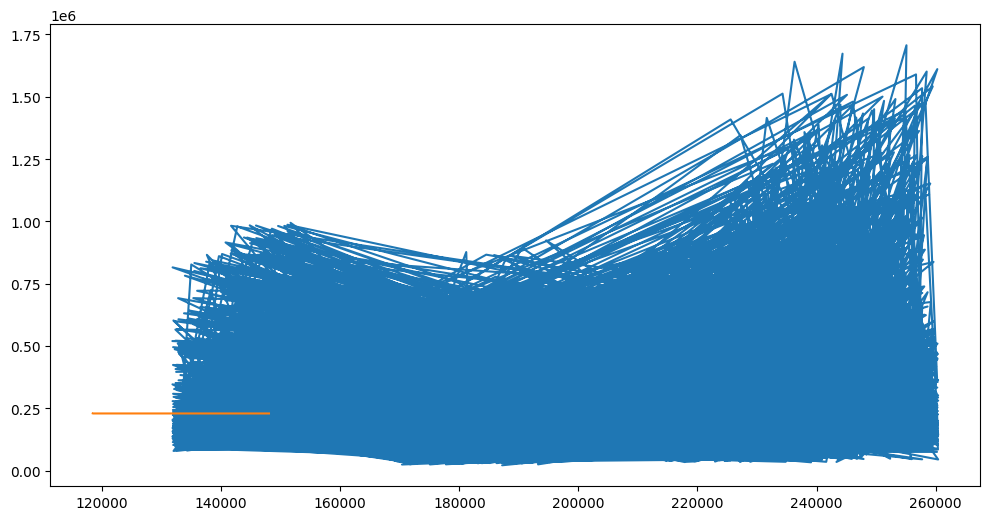

In [24]:
import matplotlib.pyplot as plt

# Plot ARIMA Forecast

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(arima_forecast, label='ARIMA')

#### **ZHVI : SARIMAX Model**

In [ ]:
# SARIMAX

sarimax_model = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_results = sarimax_model.fit()
sarimax_forecast = sarimax_results.forecast(steps=len(y_test), exog=X_test)
sarimax_mse = mean_squared_error(y_test, sarimax_forecast)
sarimax_r2 = r2_score(y_test, sarimax_forecast)
print(f'SARIMAX MSE: {sarimax_mse:.2f}, R^2: {sarimax_r2:.2f}')

In [ ]:
# Plot SARIMAX Forecast

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(sarimax_forecast, label='ARIMA')

In [ ]:




from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import LSTM, Dense
from prophet import Prophet






# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_reg_forecast = rf_reg.predict(X_test)
rf_reg_mse = mean_squared_error(y_test, rf_reg_forecast)
rf_reg_r2 = r2_score(y_test, rf_reg_forecast)
print(f'Random Forest Regression MSE: {rf_reg_mse:.2f}, R^2: {rf_reg_r2:.2f}')

# XGBoost Regression
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
xgb_reg_forecast = xgb_reg.predict(X_test)
xgb_reg_mse = mean_squared_error(y_test, xgb_reg_forecast)
xgb_reg_r2 = r2_score(y_test, xgb_reg_forecast)
print(f'XGBoost Regression MSE: {xgb_reg_mse:.2f}, R^2: {xgb_reg_r2:.2f}')

# LSTM
X_train_lstm = np.reshape(y_train.values, (len(y_train), 1, 1))
X_test_lstm = np.reshape(y_test.values, (len(y_test), 1, 1))

lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(1, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=1, verbose=2)

lstm_forecast = lstm_model.predict(X_test_lstm)
lstm_mse = mean_squared_error(y_test, lstm_forecast.flatten())
lstm_r2 = r2_score(y_test, lstm_forecast.flatten())
print(f'LSTM MSE: {lstm_mse:.2f}, R^2: {lstm_r2:.2f}')

# Prophet
df_prophet = df.rename(columns={'Date': 'ds', 'ZHVI': 'y'})
prophet_model = Prophet()
prophet_model.fit(df_prophet)
future = prophet_model.make_future_dataframe(periods=len(y_test))
prophet_forecast = prophet_model.predict(future)
prophet_mse = mean_squared_error(y_test, prophet_forecast['yhat'].values[-len(y_test):])
prophet_r2 = r2_score(y_test, prophet_forecast['yhat'].values[-len(y_test):])
print(f'Prophet MSE: {prophet_mse:.2f}, R^2: {prophet_r2:.2f}')

# Plot forecasts
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(arima_forecast, label='ARIMA')
plt.plot(sarimax_forecast, label='SARIMAX')
plt.plot(rf_reg_forecast, label='Random Forest Regression')
plt.plot(xgb_reg_forecast, label='XGBoost Regression')
plt.plot(lstm_forecast.flatten(), label='LSTM')
plt.plot(prophet_forecast['yhat'].values[-len(y_test):], label='Prophet')
plt.legend()
plt.show()

# Streamlit app
import streamlit as st

def predict_zhvi(region, state, type, date):
    encoded_data = categorical_pipeline.transform([[region, state, type]])
    date_year = pd.to_datetime(date).year
    X_new = np.concatenate((encoded_data, [[date_year]]), axis=1)
    
    # Choose the best performing model
    model = xgb_reg  # Replace with the desired model
    
    prediction = model.predict(X_new)[0]
    return prediction

st.title('Zillow Housing Price Prediction')

region = st.selectbox('Region', df['Region'].unique())
state = st.selectbox('State', df['State'].unique())
type = st.selectbox('Type', df['Type'].unique())
date = st.date_input('Date')

if st.button('Predict'):
    predicted_zhvi = predict_zhvi(region, state, type, date)
    st.write(f'Predicted ZHVI: ${predicted_zhvi:.2f}')

#### **ARIMA Model**